<a href="https://colab.research.google.com/github/sush0677/Assigment/blob/main/CVAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Thresholding***

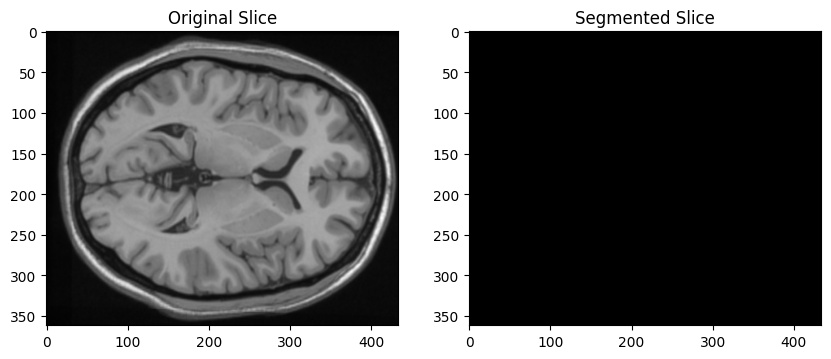

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load MRI data
data = loadmat('Brain.mat')
T1 = data['T1']  # MRI images
label = data['label']  # Pre-segmented images

# Function to apply thresholding
def thresholding(image, threshold):
    # Apply threshold
    segmented = np.where(image > threshold, 1, 0)
    return segmented

# Choose a slice to work with
slice_index = 0  # Example: first slice
slice_image = T1[:, :, slice_index]

# Visual inspection to choose a threshold
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(slice_image, cmap='gray')
plt.title('Original Slice')

# Apply thresholding - you may need to adjust this value
threshold_value = 100  # Example threshold value
segmented_slice = thresholding(slice_image, threshold_value)

plt.subplot(1, 2, 2)
plt.imshow(segmented_slice, cmap='gray')
plt.title('Segmented Slice')
plt.show()


# ***Otsu's Method***

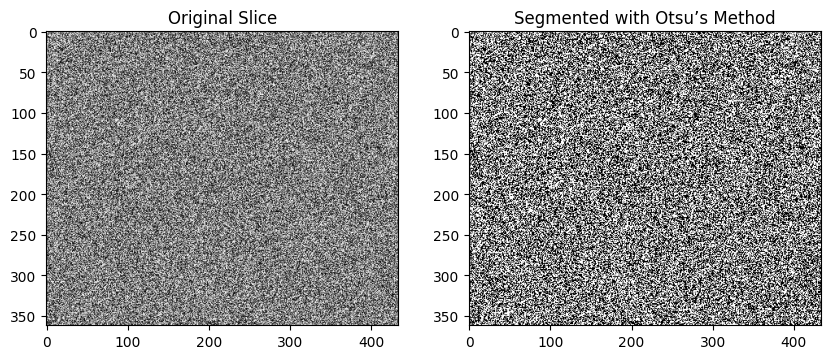

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the data
data = loadmat('Brain.mat')
T1 = data['T1']  # MRI images

# Convert a slice to 8-bit grayscale
slice_index = 0  # Example: first slice
slice_image = T1[:, :, slice_index].astype(np.uint8)

# Apply Otsu's thresholding
ret, thresh = cv2.threshold(slice_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(slice_image, cmap='gray')
plt.title('Original Slice')
plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Segmented with Otsu’s Method')
plt.show()


# ***K-Means Clustering***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


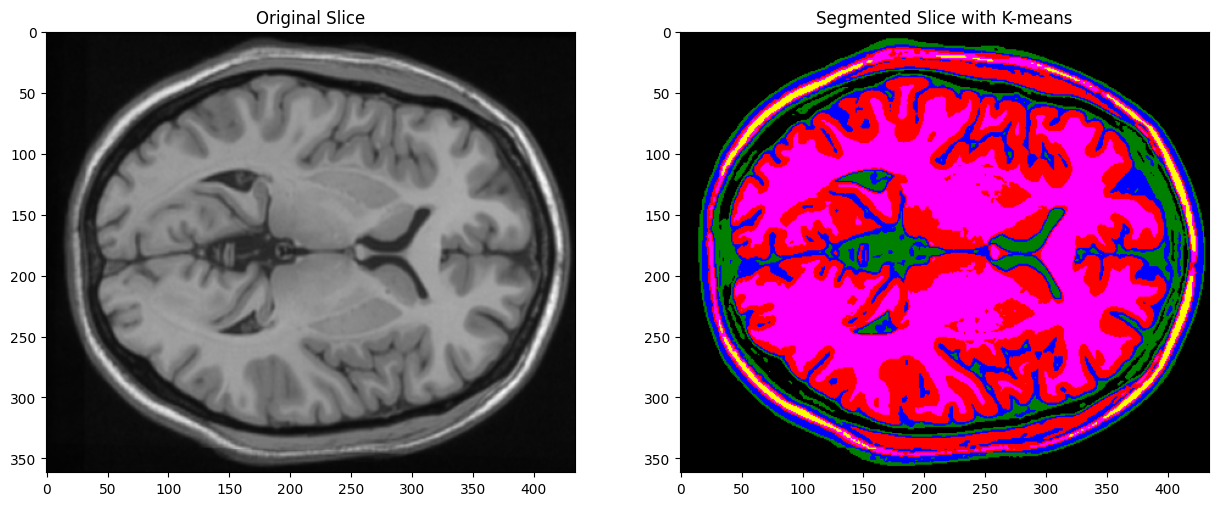

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage.color import label2rgb

# Load MRI data
data = loadmat('Brain.mat')
T1 = data['T1']  # MRI images

# Choose a slice to work with
slice_index = 0  # Example: first slice
slice_image = T1[:, :, slice_index]

# Reshape the image for K-means
image_reshaped = slice_image.reshape((-1, 1))

# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=0).fit(image_reshaped)
segmented = kmeans.labels_.reshape(slice_image.shape)

# Convert segmented image to RGB using label2rgb for visualization
segmented_rgb = label2rgb(segmented, bg_label=0)

# Display the results
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(slice_image, cmap='gray')
plt.title('Original Slice')

plt.subplot(1, 2, 2)
plt.imshow(segmented_rgb)
plt.title('Segmented Slice with K-means')
plt.show()


# ***Watershed***

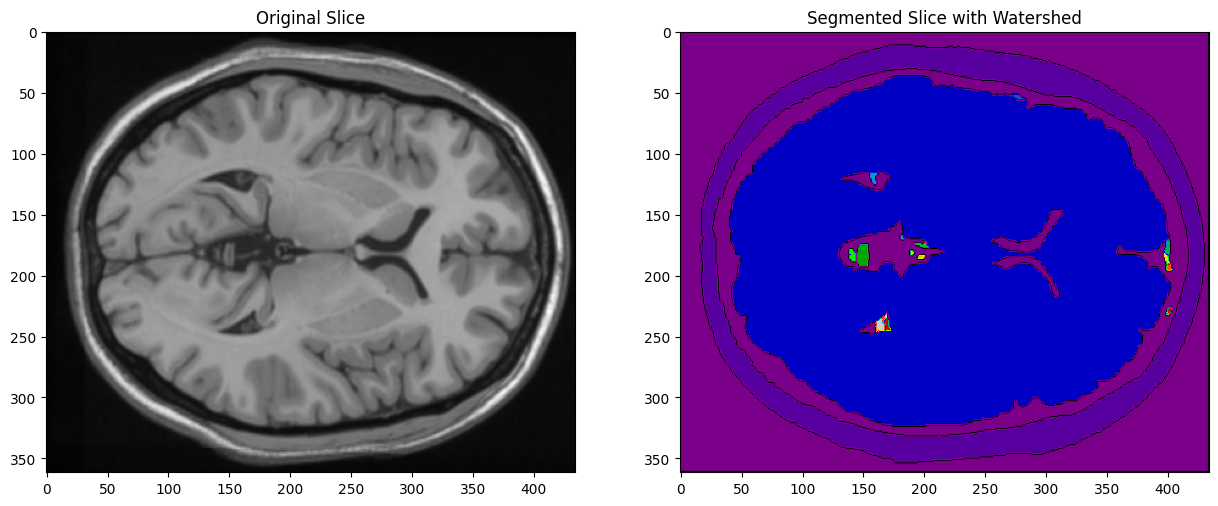

In [ ]:
import cv2
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load MRI data
data = loadmat('Brain.mat')
T1 = data['T1']  # MRI images

# Choose a slice to work with
slice_index = 0  # Example: first slice
slice_image = T1[:, :, slice_index].astype(np.float32)  # Ensure the image is a floating-point type

# Normalize the image to the range [0, 255]
slice_image = cv2.normalize(slice_image, None, 0, 255, cv2.NORM_MINMAX)

# Convert the image to 8-bit
slice_image_8u = np.uint8(slice_image)

# Preprocessing: Apply a Gaussian blur to smooth the image
blurred = cv2.GaussianBlur(slice_image_8u, (5, 5), 0)

# Find sure foreground area by applying a threshold
ret, sure_fg = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find sure background area
sure_bg = cv2.dilate(sure_fg, None, iterations=3)

# Finding unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Convert markers to the correct type
markers32 = np.int32(markers)

# Apply the watershed algorithm
cv2.watershed(cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB), markers32)

# Generate the segmentation result
segmented = markers32.copy()
segmented[segmented == -1] = 0
segmented = np.uint8(segmented)

# Display the results
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(slice_image, cmap='gray')
plt.title('Original Slice')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='nipy_spectral')
plt.title('Segmented Slice with Watershed')
plt.show()


Region Gr

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

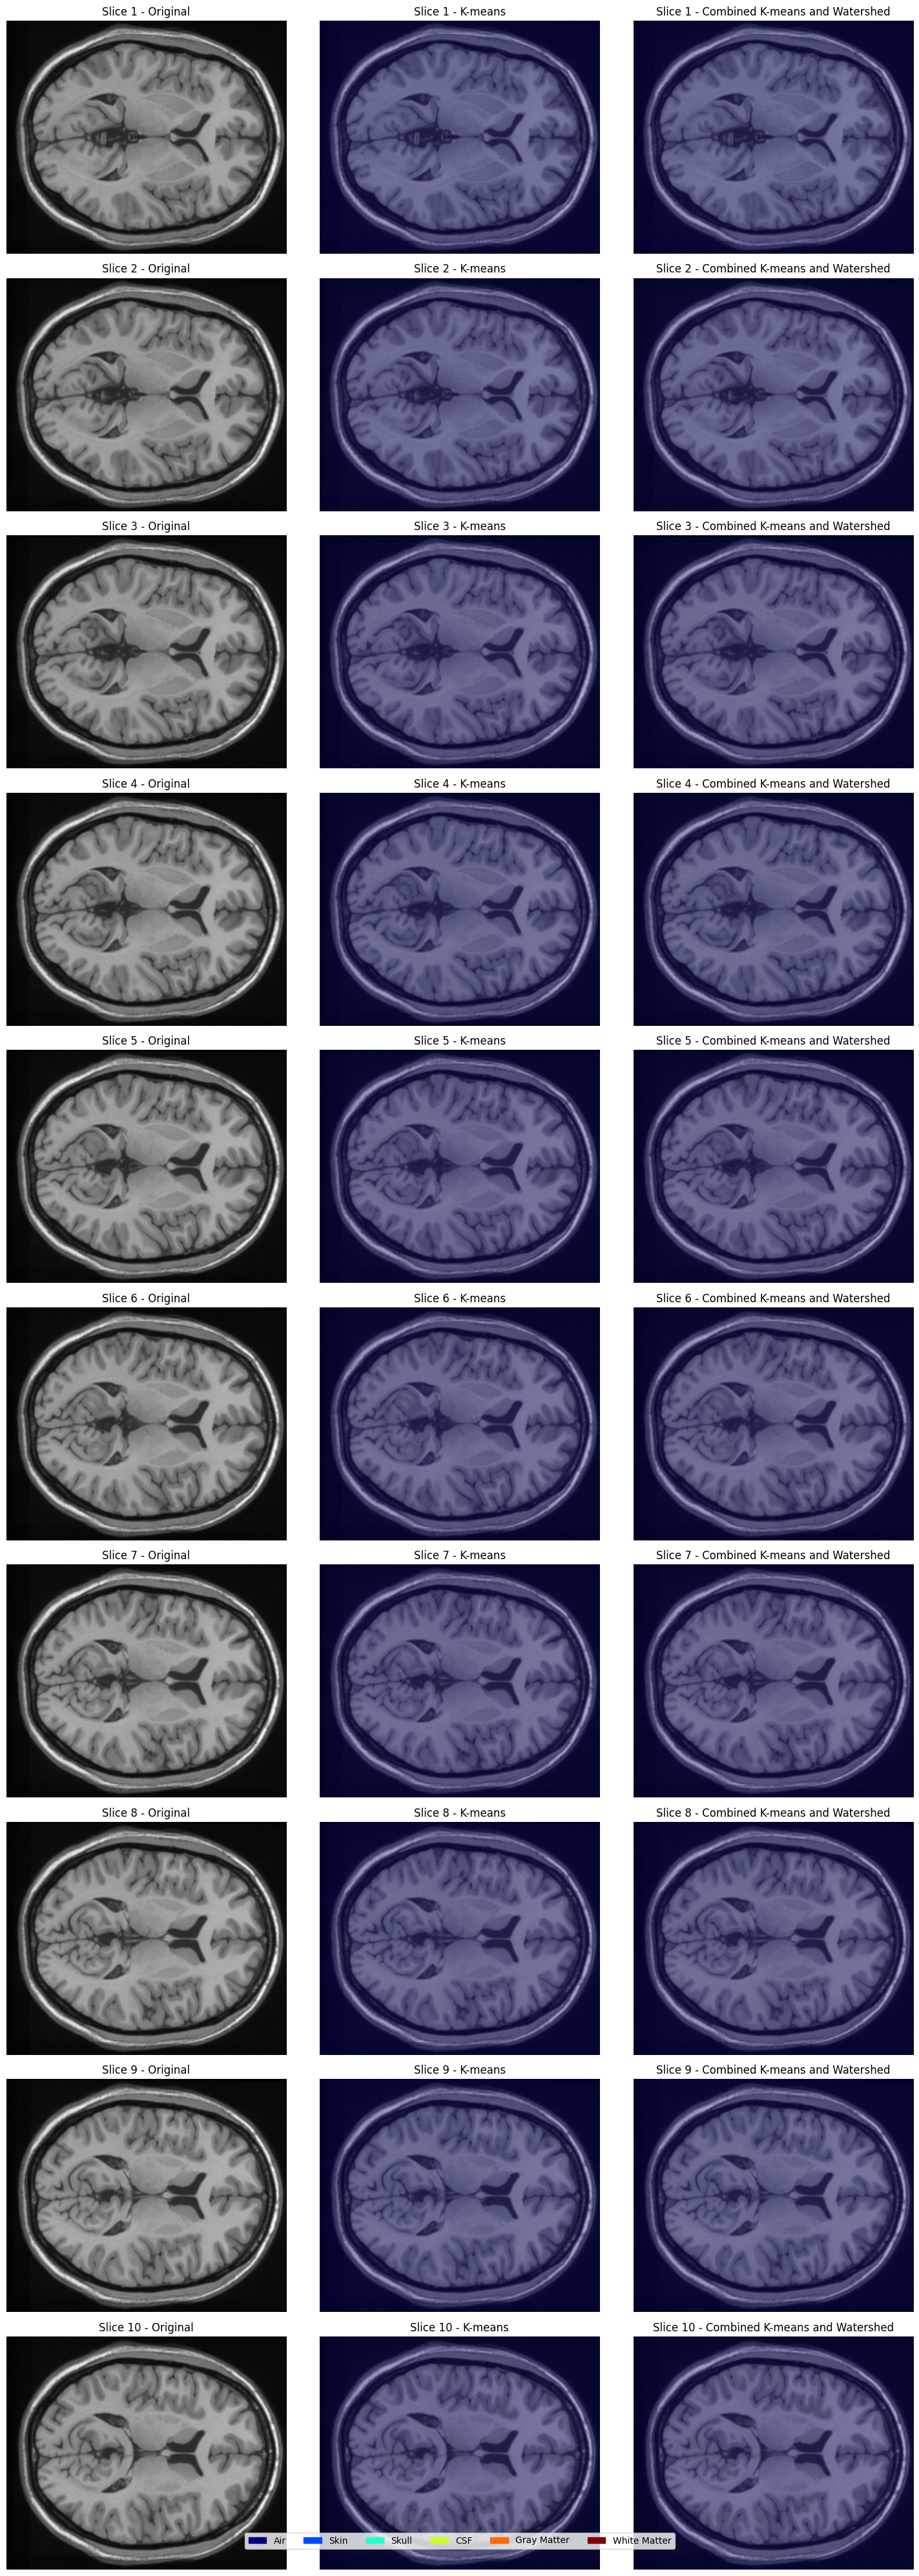

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk, dilation
from skimage.segmentation import mark_boundaries, watershed
from skimage.filters import rank
from skimage.measure import label
from skimage.feature import peak_local_max
from skimage.color import label2rgb
import matplotlib.patches as mpatches
from scipy import ndimage as ndi
from sklearn.cluster import KMeans
from scipy.io import loadmat

# Load the .mat file and normalize the data
mat = loadmat('Brain.mat')  # Update the path to your Brain.mat file
T1 = mat['T1'].astype(np.float32)
T1_normalized = (T1 - np.min(T1)) / (np.max(T1) - np.min(T1))

n_clusters = 6  # Number of clusters for K-means

# Define the colormap
cmap = plt.cm.jet

# Process each slice
fig, axes = plt.subplots(10, 3, figsize=(15, 40))  # 10 rows for slices, 3 columns for K-means, markers, and Watershed
axes = axes.flatten()

for i in range(T1_normalized.shape[2]):  # Assuming 10 slices
    # Flatten the image for K-means
    flat_img = T1_normalized[:, :, i].reshape(-1, 1)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(flat_img).reshape(T1_normalized[:, :, i].shape)

    # Create markers for Watershed based on K-means results
    # Here you might decide to refine only the first three clusters from K-means with Watershed
    mask = np.isin(labels, [0, 1, 2])  # Assuming labels 0, 1, 2 correspond to air, skin, and skull
    markers = np.zeros_like(labels)
    markers[mask] = labels[mask]
    markers[~mask] = -1  # Mark the rest for exclusion

    # Calculate the gradient of the original image
    gradient = ndi.sobel(T1_normalized[:, :, i])

    # Apply the Watershed algorithm
    watershed_labels = watershed(gradient, markers, mask=mask)

    # Combine K-means and Watershed results
    combined_labels = labels.copy()
    combined_labels[mask] = watershed_labels[mask]

    # Map labels to the same color for all slices
    # For accurate mapping, you might need a function that maps K-means labels to colors consistently
    labeled_img = label2rgb(combined_labels, image=T1_normalized[:, :, i], colors=[cmap(l) for l in np.unique(combined_labels)], bg_label=-1)

    # Visualize the segmentation
    axes[i * 3].imshow(T1_normalized[:, :, i], cmap='gray')
    axes[i * 3].axis('off')
    axes[i * 3].set_title(f'Slice {i + 1} - Original')

    axes[i * 3 + 1].imshow(label2rgb(labels, image=T1_normalized[:, :, i], colors=[cmap(l) for l in range(n_clusters)], bg_label=-1))
    axes[i * 3 + 1].axis('off')
    axes[i * 3 + 1].set_title(f'Slice {i + 1} - K-means')

    axes[i * 3 + 2].imshow(labeled_img)
    axes[i * 3 + 2].axis('off')
    axes[i * 3 + 2].set_title(f'Slice {i + 1} - Combined K-means and Watershed')

# Create a legend for tissue types
tissue_types = ['Air', 'Skin', 'Skull', 'CSF', 'Gray Matter', 'White Matter']
patches = [mpatches.Patch(color=cmap(i / (n_clusters - 1)), label=f'{tissue_types[i]}') for i in range(n_clusters)]
plt.figlegend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, 0.01), ncol=6)

plt.tight_layout()
plt.show()
